In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [18]:
X, y = make_blobs(n_samples=40, centers=2, random_state=42)

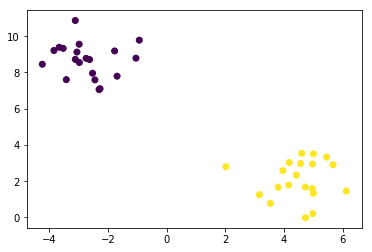

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [54]:
class KNNCustom:
    
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict_point(self, point):
        
        distances = []
        
        for x_item, y_item in zip(self.X, self.y):
            dis = KNNCustom.distance(point, x_item)
            distances.append((dis, y_item))
        
        dis_sorted = sorted(distances) # sorted by item zero (distance)
        top_k = dis_sorted[:self.k] # get top k items from list
        top = np.array(top_k) # convert it to numpy
        vals, counts = np.unique(top[:, 1], return_counts=True)
        
        
        # argmax gives index of max item. so we got max voting 
        # and took item coressponding to that
        return vals[np.argmax(counts)]
    
    
    def predict(self, X):
        results = []
        for point in X:
            results.append(self.predict_point(point))
        
        return np.array(results, dtype=int)
    
    def score(self, X, y):
        y_out = self.predict(X)
        return np.mean(y_out == y)
    
    @classmethod
    def distance(cls, source, target):
        return np.sum((source - target) ** 2)
        

In [55]:
model = KNNCustom(20)
model.fit(X_train, y_train)
model.predict(X[:10])

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [56]:
y_test[:10]

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
sorted()

In [15]:
names = ["Anuj", "Amit", "Mohit"]

In [16]:
ages = [23, 4, 45]

In [17]:
list(zip(names, ages))

[('Anuj', 23), ('Amit', 4), ('Mohit', 45)]

In [38]:
np.unique?

In [53]:
np.mean([True, True, True, False])

0.75